In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import filter_data 
import imp
imp.reload(filter_data)
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100


In [11]:
sepsis_codes = filter_data.get_sepsis_icd_codes()
sepsis_codes

,icd_code,long_title
7208,67020,"Puerperal sepsis, unspecified as to episode of..."
7267,67022,"Puerperal sepsis, delivered, with mention of p..."
7268,67024,"Puerperal sepsis, postpartum condition or comp..."
9162,77181,Septicemia [sepsis] of newborn
12082,99591,Sepsis
12083,99592,Severe sepsis
12263,A021,Salmonella sepsis
12419,A227,Anthrax sepsis
12441,A267,Erysipelothrix sepsis
12476,A327,Listerial sepsis


In [12]:
sepsis_patients = filter_data.get_all_sepsis_patients()
sepsis_patients

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title,gender,anchor_age
0,14559749,26693268,18,99591,9,Sepsis,M,71
1,19599475,21996765,14,99591,9,Sepsis,F,74
2,15138108,21384778,6,99591,9,Sepsis,M,83
3,13276920,28598982,11,99591,9,Sepsis,F,78
4,17190067,25034925,6,99591,9,Sepsis,M,91
...,...,...,...,...,...,...,...,...
21551,13066246,25785241,19,T8144XA,10,"Sepsis following a procedure, initial encounter",F,64
21552,12167940,27983916,7,T8144XA,10,"Sepsis following a procedure, initial encounter",F,63
21553,17169334,28390536,13,T8144XA,10,"Sepsis following a procedure, initial encounter",M,77
21554,11285029,29025090,5,T8144XA,10,"Sepsis following a procedure, initial encounter",F,37


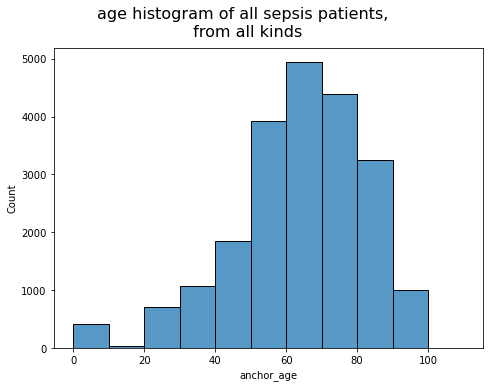

In [13]:
# plot histogram of all sepsis patients
plt.rcParams["figure.figsize"] = (8,6)
sns.histplot(sepsis_patients["anchor_age"], bins=range(0,120,10))
plt.suptitle("age histogram of all sepsis patients, \n from all kinds", fontsize=16)
plt.tight_layout(pad=5)
plt.savefig("all_sepsis_dignosis_age_hist")

In [14]:
different_sepsis_amounts = sepsis_patients.groupby(by="long_title").agg({"subject_id": "count"}).sort_values(by="subject_id", ascending=False)
different_sepsis_amounts

,subject_id
long_title,
Severe sepsis,5291
"Sepsis, unspecified organism",4766
Severe sepsis with septic shock,3175
Sepsis,2988
Severe sepsis without septic shock,1226
Sepsis due to Escherichia coli [E. coli],849
Other specified sepsis,563
Sepsis due to Methicillin susceptible Staphylococcus aureus,403
Sepsis due to Enterococcus,329


In [15]:
different_sepsis_amounts = sepsis_patients.groupby(by="long_title").agg({"subject_id": "count"}).sort_values(by="subject_id", ascending=False)
different_sepsis_amounts_normalized = different_sepsis_amounts.cumsum()/different_sepsis_amounts.sum()
different_sepsis_amounts_normalized = different_sepsis_amounts_normalized.reset_index()
different_sepsis_amounts_normalized

,long_title,subject_id
0,Severe sepsis,0.245454
1,"Sepsis, unspecified organism",0.466552
2,Severe sepsis with septic shock,0.613843
3,Sepsis,0.752459
4,Severe sepsis without septic shock,0.809334
5,Sepsis due to Escherichia coli [E. coli],0.848720
6,Other specified sepsis,0.874838
7,Sepsis due to Methicillin susceptible Staphylo...,0.893533
8,Sepsis due to Enterococcus,0.908796
9,Other Gram-negative sepsis,0.923409


In [17]:
# find diagnosis of 90% of the patients
filtered_sepsis = pd.read_csv("filtered\\filtered_patients.csv")
filtered_sepsis

,Unnamed: 0,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title,gender,anchor_age
0,0,14559749,26693268,18,99591,9,Sepsis,M,71
1,1,19599475,21996765,14,99591,9,Sepsis,F,74
2,2,15138108,21384778,6,99591,9,Sepsis,M,83
3,3,13276920,28598982,11,99591,9,Sepsis,F,78
4,4,17190067,25034925,6,99591,9,Sepsis,M,91
...,...,...,...,...,...,...,...,...,...
19256,21232,12624822,21337407,1,A4189,10,Other specified sepsis,F,26
19257,21233,18351737,21349460,2,A4189,10,Other specified sepsis,F,44
19258,21234,17326715,28880929,1,A4189,10,Other specified sepsis,F,65
19259,21235,10048262,20845468,1,A4189,10,Other specified sepsis,M,41


In [18]:
filtered_sepsis["long_title"].unique()

array(['Sepsis', 'Severe sepsis with septic shock',
       'Sepsis due to Escherichia coli [E. coli]',
       'Sepsis, unspecified organism',
       'Severe sepsis without septic shock', 'Severe sepsis',
       'Sepsis due to Methicillin susceptible Staphylococcus aureus',
       'Other specified sepsis'], dtype=object)

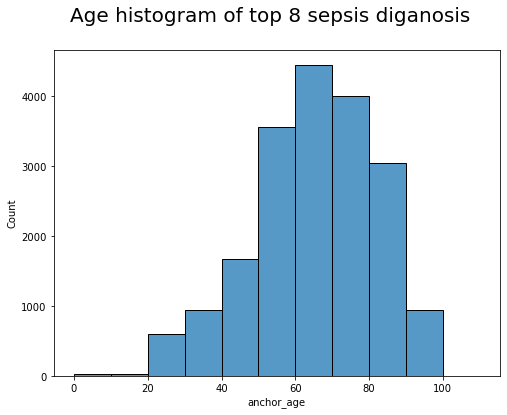

In [19]:
# histplot of top 8 sepsis diagnosis which includes 90% of patients
plt.rcParams["figure.figsize"] = (8,6)
sns.histplot(filtered_sepsis["anchor_age"], bins=range(0,120,10))
plt.suptitle("Age histogram of top 8 sepsis diganosis", fontsize=20)
plt.savefig("age_histogram_of_top_8_sepsis_diganosis")

In [20]:
# inset \n after 3 words in the diganosis name
def insert_space(str):
    count = 1
    new_str = ""
    for word in str.split():
        new_str += word
        if count < 3:
            new_str += " "
        else:
            new_str += "\n"
            count = 0
        count += 1
    return new_str

# change the titles of the diagnosis so it will possible to show them on graph
filtered_sepsis_title_fixed = filtered_sepsis.copy()
filtered_sepsis_title_fixed["long_title"] = filtered_sepsis_title_fixed["long_title"].apply(lambda x:insert_space(x))

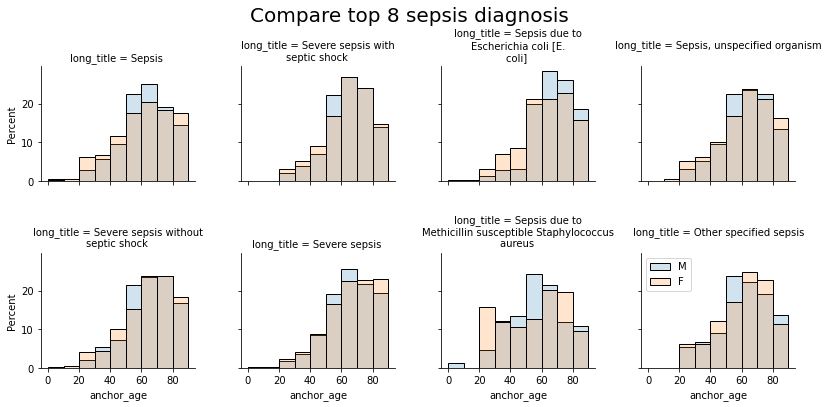

In [21]:
g = sns.FacetGrid(filtered_sepsis_title_fixed, col="long_title", hue="gender", col_wrap=4)
g.map(sns.histplot, "anchor_age", **{"bins":range(0,100,10), "stat":"percent", "alpha":0.2})
plt.suptitle("Compare top 8 sepsis diagnosis", fontsize=20)
plt.tight_layout(pad= 3)
plt.legend()
plt.savefig("top_8_diagnosis_seperated")